In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
df = pd.read_csv('https://raw.githubusercontent.com/datasets/finance-vix/main/data/vix-daily.csv')
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE
0,01/02/1990,17.24,17.24,17.24,17.24
1,01/03/1990,18.19,18.19,18.19,18.19
2,01/04/1990,19.22,19.22,19.22,19.22
3,01/05/1990,20.11,20.11,20.11,20.11
4,01/08/1990,20.26,20.26,20.26,20.26


In [2]:
df.tail()

,DATE,OPEN,HIGH,LOW,CLOSE
8617,03/04/2024,13.49,13.58,13.32,13.49
8618,03/05/2024,13.75,15.10,13.75,14.46
8619,03/06/2024,14.27,14.93,13.89,14.50
8620,03/07/2024,14.98,14.98,14.25,14.44
8621,03/08/2024,14.22,15.53,13.97,14.74


In [3]:
# select data from Jan 2018
df = df[df.index > 7051]

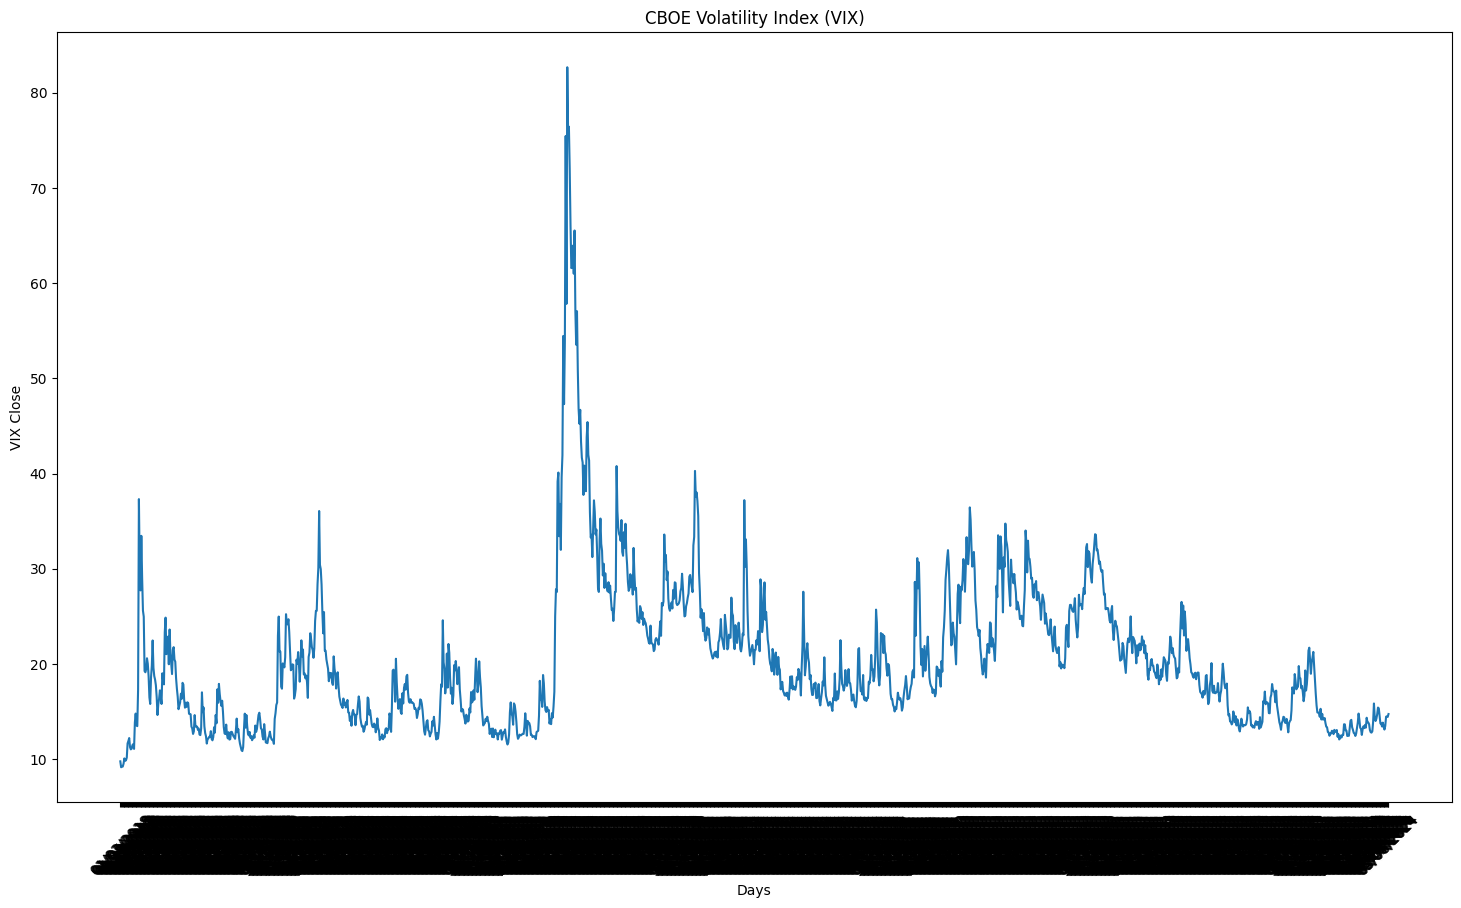

In [4]:
plt.figure(figsize=(18,10))
plt.plot(df['DATE'], df['CLOSE'])
plt.title('CBOE Volatility Index (VIX)')
plt.xlabel('Days')
plt.ylabel('VIX Close')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

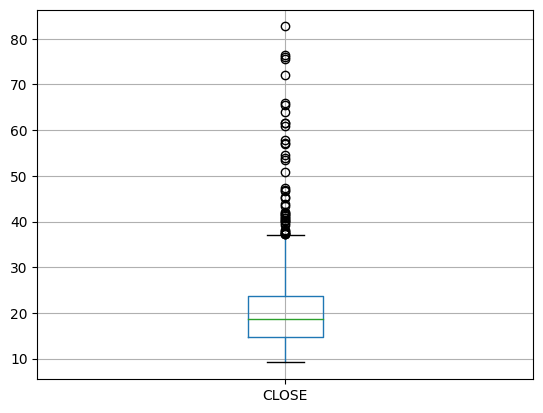

In [5]:
df[['DATE','CLOSE']].boxplot()

In [6]:
Q1 = df['CLOSE'].describe()['25%']
Q3 = df['CLOSE'].describe()['75%']
mean = df['CLOSE'].describe()['mean']
std = df['CLOSE'].describe()['std']

IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print('upper outlayer threshold   {}\nlower outlayer threshold   {}'.format(upper,lower))
df['CLOSE'].describe()

upper outlayer threshold   37.1475
lower outlayer threshold   1.3474999999999984


count    1570.000000
mean       20.365847
std         7.949851
min         9.150000
25%        14.772500
50%        18.705000
75%        23.722500
max        82.690000
Name: CLOSE, dtype: float64

<AxesSubplot:>

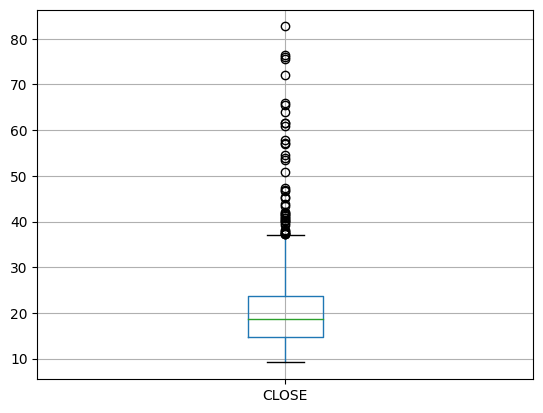

In [7]:
df[['DATE','CLOSE']].boxplot()

In [8]:
df1 = df
df1['CLOSE'] = [min(df1['CLOSE'].iloc[i], upper)  for i in range(df1.shape[0])]
df1['CLOSE'] = [max(df1['CLOSE'].iloc[i], lower)  for i in range(df1.shape[0])]

meanO = df1['CLOSE'].describe()['mean']
stdO = df1['CLOSE'].describe()['std']

In [9]:
print('mean {}, \nmeanO {}, \ndelta mean% {},\n\nstd {}, \nstdO {}, \ndelta std {}'.format(mean, meanO, (mean - meanO)/mean*100, std, stdO, (std - stdO)))

mean 20.365847133757963, 
meanO 19.994178343949017, 
delta mean% 1.8249611094884295,

std 7.949851156589433, 
stdO 6.411404919624117, 
delta std 1.5384462369653154


In [10]:
df.describe()

,OPEN,HIGH,LOW,CLOSE
count,1570.000000,1570.000000,1570.000000,1570.000000
mean,20.556803,21.775503,19.404968,19.994178
std,8.005877,8.842642,7.191926,6.411405
min,9.010000,9.310000,8.920000,9.150000
25%,14.912500,15.572500,14.250000,14.772500
50%,18.820000,19.935000,17.805000,18.705000
75%,23.882500,25.325000,22.417500,23.722500
max,82.690000,85.470000,70.370000,37.147500


# Regressions
We can regress VIX with SPX

[*********************100%***********************]  1 of 1 completed


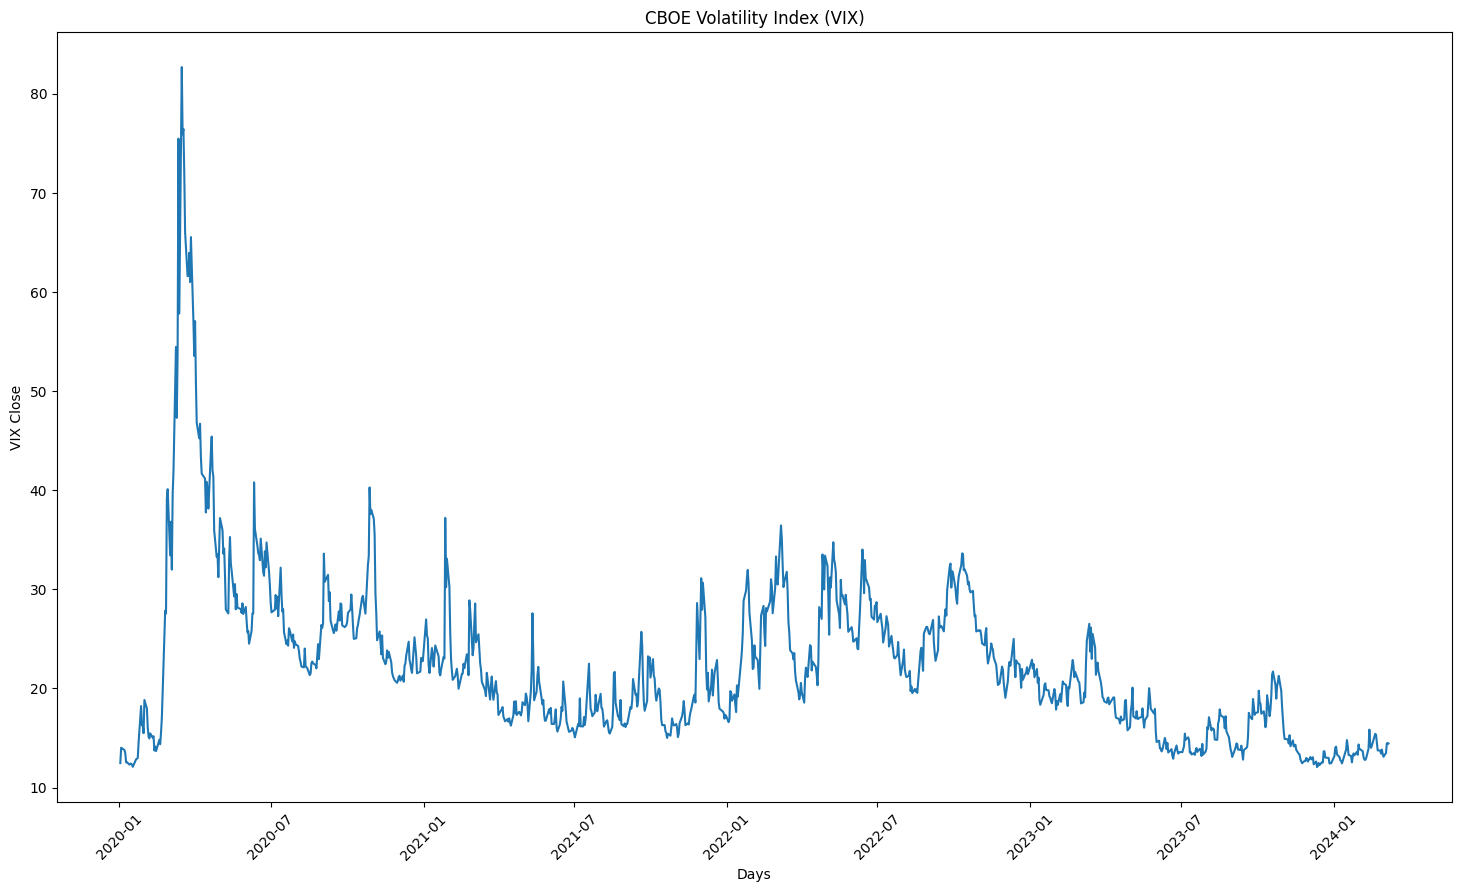

,Adj Close
0,12.47
1,14.02
2,13.85
3,13.79
4,13.45
...,...
1047,13.11
1048,13.49
1049,14.46
1050,14.50


In [11]:
import yfinance as yf

start="2020-01-01"
end="2024-03-08"
index = ['^VIX'] 
X = yf.download(tickers=index, start=start, end=end, interval="1d")

plt.figure(figsize=(18,10))
plt.plot(X['Adj Close'])
plt.title('CBOE Volatility Index (VIX)')
plt.xlabel('Days')
plt.ylabel('VIX Close')
plt.xticks(rotation=45)
plt.show()
X.reset_index(inplace=True)
X = X[['Adj Close']]
X


[*********************100%***********************]  1 of 1 completed


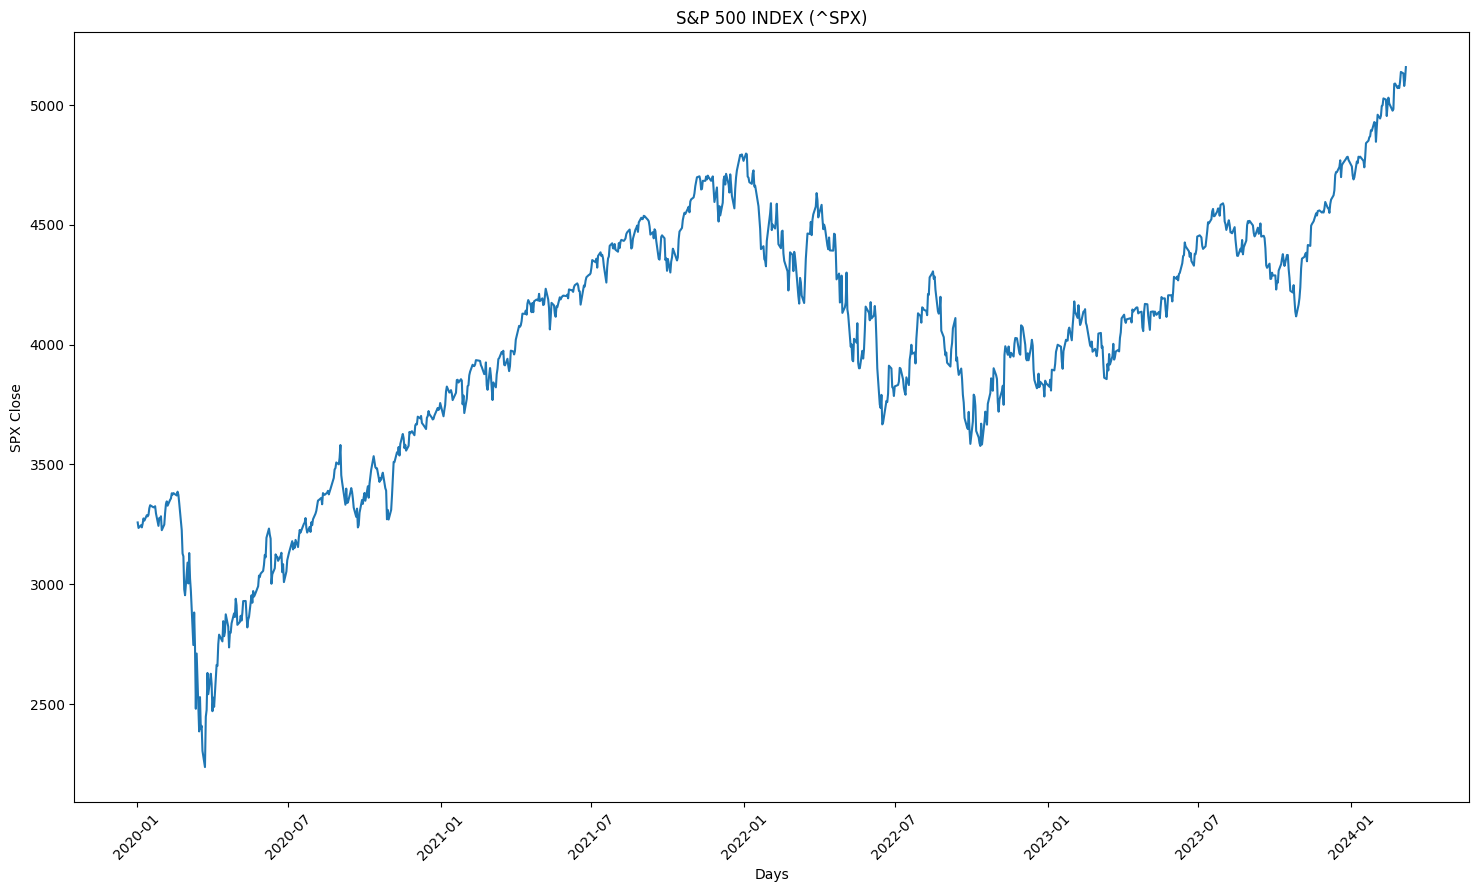

,Adj Close
0,3257.850098
1,3234.850098
2,3246.280029
3,3237.179932
4,3253.050049
...,...
1047,5137.080078
1048,5130.950195
1049,5078.649902
1050,5104.759766


In [12]:
index = ['^SPX'] 
y = yf.download(tickers=index, start=start, end=end, interval="1d")

plt.figure(figsize=(18,10))
plt.plot(y['Adj Close'])
plt.title('S&P 500 INDEX (^SPX)')
plt.xlabel('Days')
plt.ylabel('SPX Close')
plt.xticks(rotation=45)
plt.show()
y.reset_index(inplace=True)
y = y[['Adj Close']]
y


C:\Users\david_4dveiyl\anaconda3\envs\fiz37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


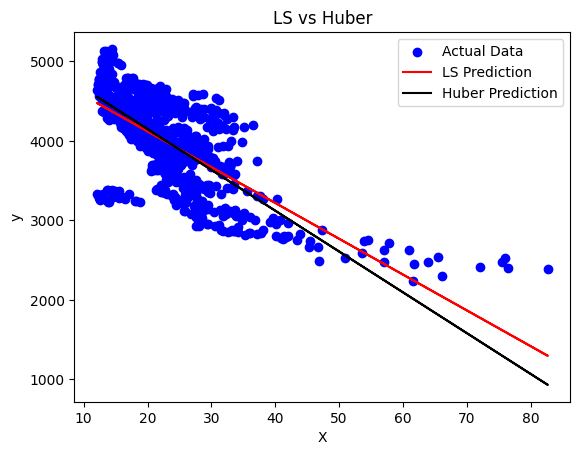

<Figure size 2500x1000 with 0 Axes>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error

def evaluate(X,y, num):
    ls_model = LinearRegression()
    ls_model.fit(X, y)
    ls_y_pred = ls_model.predict(X)

    huber_model = HuberRegressor()
    huber_model.fit(X, y)
    huber_y_pred =huber_model.predict(X)
    
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, ls_y_pred, color='red', label='LS Prediction')
    plt.plot(X, huber_y_pred, color='black', label='Huber Prediction')
    plt.title('LS vs Huber')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
        
  # plt.tight_layout()
    plt.figure(figsize=(25,10))
    plt.show()
        
evaluate(X,y, len(y))

In [14]:
print('Huber prediction is less influenced by outlayers (VIX values > {})'.format(upper))

Huber prediction is less influenced by outlayers (VIX values > 37.1475)


In [15]:
import numpy as np
X1 = np.log(X/X.shift(1)).dropna()
y1 = np.log(y/y.shift(1)).dropna()

C:\Users\david_4dveiyl\anaconda3\envs\fiz37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


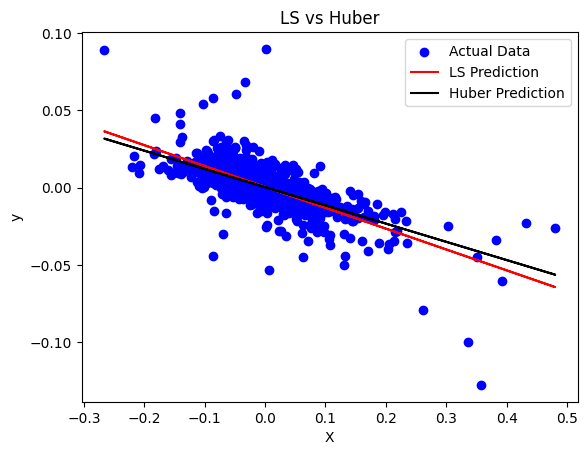

<Figure size 2500x1000 with 0 Axes>

In [16]:
evaluate(X1,y1, len(y1))

#### Differenciation improve predictions